# 0.0 Import

In [1]:
import pickle
import numpy    as np
import pandas   as pd
from matplotlib import pyplot as plt

from sklearn import ensemble as en

import funcoes_suporte as fs

## 0.1 Help functions

In [2]:
fs.jupyter_settings(altura= 18, largura= 14, fonte= 11)
fs.supressao_notacao()

## 0.2 Load interim data

In [3]:
x_treino = pickle.load( open( "../data/interim/x_treino_dp.pkl", "rb" ) )
y_treino = pickle.load( open( "../data/interim/y_treino_dp.pkl", 'rb' ) )

### 0.2.1 Primeira Iteração para formar um baseline

In [4]:
cols_selected = x_treino.select_dtypes( include = ['int64','float64'])
cols_selected = cols_selected.drop( columns= ['id'])
cols_selected = cols_selected.columns
x_treino = x_treino[cols_selected]

# 1.0 Feature Selection

In [5]:
forest = en.ExtraTreesClassifier( n_estimators= 250, random_state= 0, n_jobs= -1)

forest.fit(x_treino, y_treino.values)

,n_estimators,250
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


## 1.1 Buscando melhores Features

Feature ranking:
                   feature  importance
0             premio_anual        0.18
0                    idade        0.16
0    cliente_dias_contrato        0.11
0         semanas_contrato        0.11
0           meses_contrato        0.11
0            codigo_regiao        0.11
0       veiculo_danificado        0.07
0          contato_cliente        0.07
0  seguro_previo_automovel        0.05
0         premio_anual_cat        0.01
0       idade_class_etaria        0.01
0                      cnh        0.00


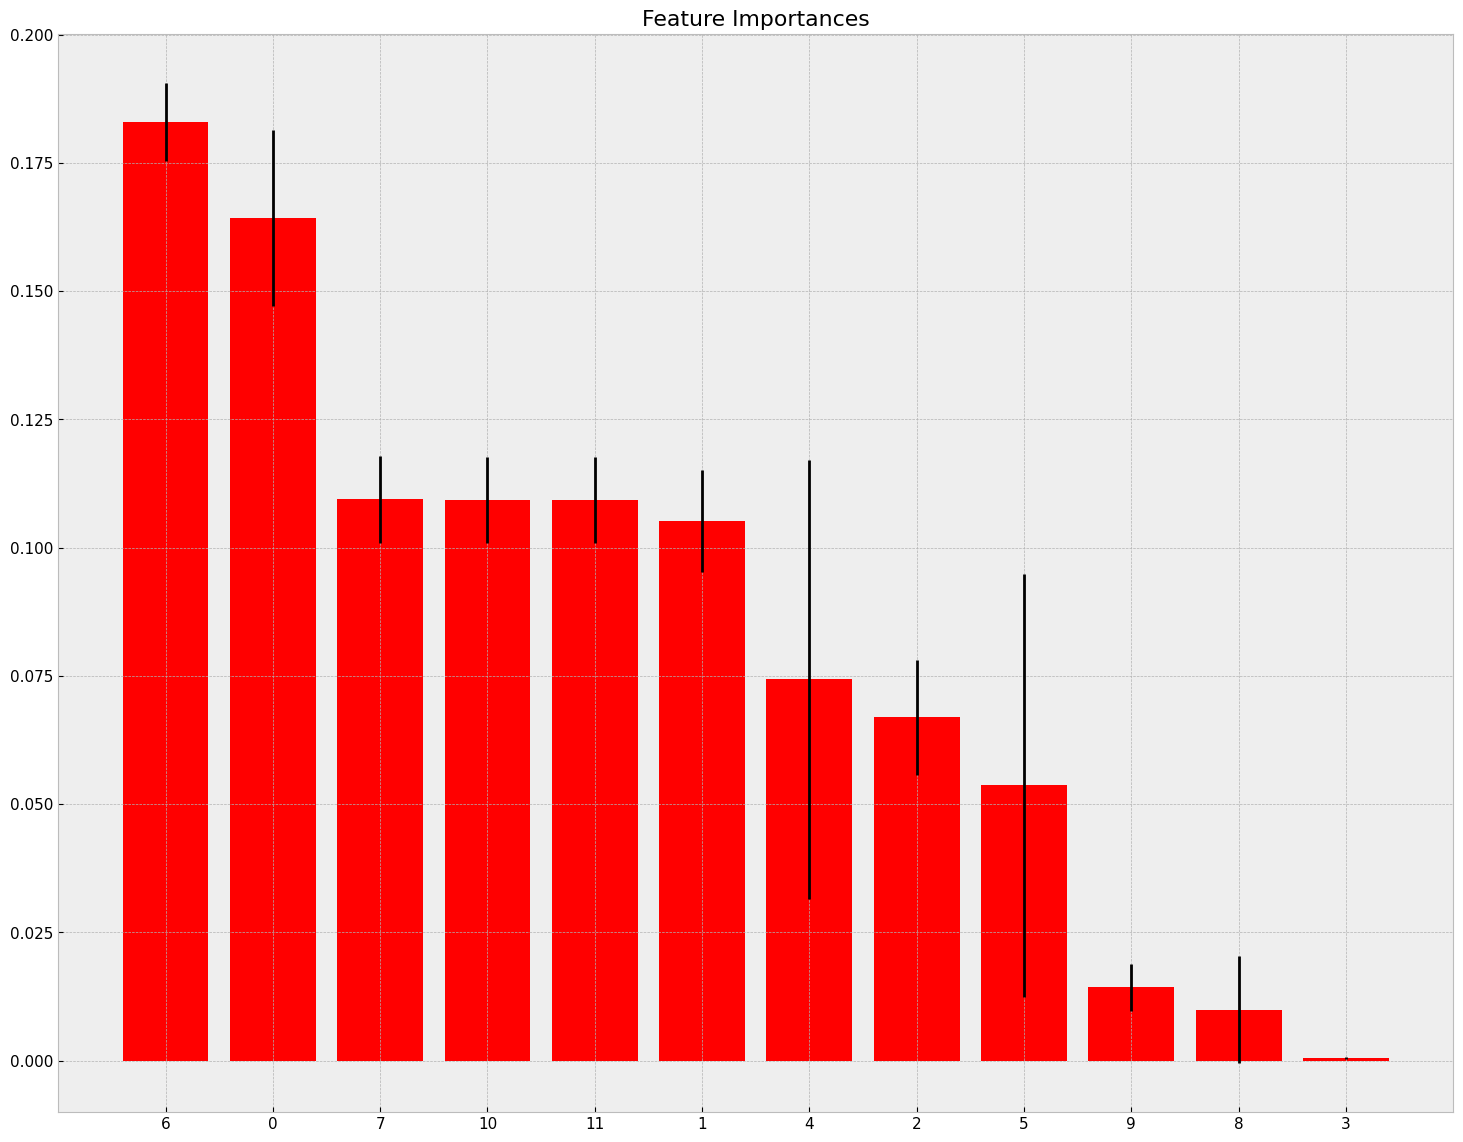

In [6]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_treino, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat( [df, aux], axis = 0)

print( df.sort_values( by = 'importance', ascending = False ) )

plt.figure()
plt.title('Feature Importances')
plt.bar(range(x_treino.shape[1]), importances[indices], color = 'r', yerr=std[indices], align='center')
plt.xticks(range(x_treino.shape[1]), indices)
plt.xlim([-1, x_treino.shape[1]])
plt.show()


## 1.2 Selecionando Features

In [ ]:
#cols_selected = df.loc[df['importance'] > 0.05].sort_values( by = 'importance', ascending = False )

In [ ]:
cols_selected = ['premio_anual',
                    'idade',
                    'cliente_dias_contrato',
                    'semanas_contrato',
                    'meses_contrato',
                    'codigo_regiao',
                    'veiculo_danificado',
                    'contato_cliente',
                    'seguro_previo_automovel']

In [6]:
#cols_selected = cols_selected['feature'].to_list()

In [7]:
cols_selected

['premio_anual',
 'idade',
 'cliente_dias_contrato',
 'semanas_contrato',
 'meses_contrato',
 'codigo_regiao',
 'veiculo_danificado',
 'contato_cliente',
 'seguro_previo_automovel']

In [8]:
x_treino = x_treino[cols_selected]

# 2.0 Export Pickle processed data

In [9]:
pickle.dump( x_treino, open( "../data/processed/x_treino.pkl", 'wb' ) )
pickle.dump( y_treino, open( "../data/processed/y_treino.pkl", 'wb' ) )
pickle.dump( cols_selected, open( "../data/processed/cols_selected.pkl", 'wb' ) )